In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import random

import pandas as pd

file_path = "../../web_service_dataset.csv"
df_original = pd.read_csv(file_path)






In [3]:
##%%
df_original

,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,...,b_std_dev_ps,b_flowStart,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,category,web_service
0,192.168.121.1,67,172.16.255.185,67,UDP,22,7620,328,394,346.363636,...,2.000000,1.555955e+09,1.555955e+09,1.554399e+12,1.035380e-02,198.657965,51.689181,84.916348,Network,DHCP
1,192.168.121.1,67,172.16.255.186,67,UDP,17,5670,328,354,333.529412,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,Network,DHCP
2,192.168.121.1,67,172.16.255.185,67,UDP,43,15124,328,394,351.720930,...,1.332347,1.555964e+09,1.555965e+09,1.554409e+12,2.233195e-02,340.268454,89.927588,124.270745,Network,DHCP
3,192.168.121.1,67,172.16.255.186,67,UDP,30,10086,328,352,336.200000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,Network,DHCP
4,192.168.121.1,0,10.130.1.166,0,ICMP,1,56,56,56,56.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,Network,ICMP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704834,192.168.128.252,137,172.16.255.186,137,UDP,9,702,78,78,78.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,System,NetBIOS
2704835,192.168.128.252,138,172.16.255.185,138,UDP,3,687,229,229,229.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,System,NetBIOS
2704836,192.168.128.252,138,172.16.255.186,138,UDP,3,687,229,229,229.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,System,NetBIOS
2704837,192.168.128.252,49879,108.177.11.188,5228,TCP,75,3520,40,66,46.933333,...,4.228907,1.559770e+09,1.559771e+09,1.558211e+12,1.150203e-02,90.155711,44.999017,14.822745,Web,Google


In [4]:
##%%
# 3.1

from sklearn.preprocessing import StandardScaler

df_copy = df_original.copy()
# Define label (non-numerical) columns
label_columns = ['src_ip', 'src_port', 'dst_ip', 'dst_port', 'category', 'web_service', 'proto']

# Store the label columns in a separate DataFrame
df_labels = df_copy[label_columns]

# Drop label columns from the numerical dataset
df_copy = df_copy.drop(label_columns, axis=1)

# Standardize the numerical columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_copy)

# Create a new DataFrame with scaled numerical data
df_scaled = pd.DataFrame(scaled_data, columns=df_copy.columns)

# Add the label columns back to the scaled DataFrame
df_scaled = pd.concat([df_scaled, df_labels.reset_index(drop=True)], axis=1)

# Confirm scaling
print("Scaled data shape:", df_scaled.shape)

web_service_categories = df_scaled.groupby('web_service')['category'].nunique()

web_services_multiple_categories = web_service_categories[web_service_categories > 1]
print("Number of web services with multiple traffic categories:", len(web_services_multiple_categories))

most_categories_service = web_service_categories.idxmax()
most_categories_count = web_service_categories.max()

print("Web service with the most traffic categories:", most_categories_service)
print("Number of categories:", most_categories_count)


##%%
df_scaled
##%%

Scaled data shape: (2704839, 46)
Number of web services with multiple traffic categories: 5
Web service with the most traffic categories: DNS
Number of categories: 4


,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,flowStart,flowEnd,flowDuration,min_piat,...,b_max_piat,b_avg_piat,b_std_dev_piat,src_ip,src_port,dst_ip,dst_port,category,web_service,proto
0,-0.017654,-0.018223,4.478531,-0.290998,0.344931,-0.466290,-0.800156,-0.799133,9.045503,-0.055404,...,2.987091,1.279851,4.959656,192.168.121.1,67,172.16.255.185,67,Network,DHCP,UDP
1,-0.018969,-0.018580,4.478531,-0.304607,0.307364,-0.495915,-0.800156,-0.799133,9.045503,-0.055098,...,-0.258028,-0.111224,-0.248445,192.168.121.1,67,172.16.255.186,67,Network,DHCP,UDP
2,-0.012135,-0.016847,4.478531,-0.290998,0.360613,-0.464258,-0.793921,-0.793053,7.670823,-0.055407,...,5.300328,2.308934,7.373345,192.168.121.1,67,172.16.255.185,67,Network,DHCP,UDP
3,-0.015552,-0.017770,4.478531,-0.305287,0.315181,-0.494202,-0.793921,-0.793053,7.670822,-0.054947,...,-0.258028,-0.111224,-0.248445,192.168.121.1,67,172.16.255.186,67,Network,DHCP,UDP
4,-0.023174,-0.019609,-0.037019,-0.405993,-0.505003,-0.512978,-0.792105,-0.792138,-0.294316,-0.055414,...,-0.258028,-0.111224,-0.248445,192.168.121.1,0,10.130.1.166,0,Network,ICMP,ICMP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704834,-0.021071,-0.019491,0.328210,-0.398508,-0.440606,-0.512978,1.569307,1.569882,5.082190,-0.032670,...,-0.258028,-0.111224,-0.248445,192.168.128.252,137,172.16.255.186,137,System,NetBIOS,UDP
2704835,-0.022648,-0.019494,2.835004,-0.347135,0.001392,-0.512978,1.569058,1.569918,7.602423,21.841174,...,-0.258028,-0.111224,-0.248445,192.168.128.252,138,172.16.255.185,138,System,NetBIOS,UDP
2704836,-0.022648,-0.019494,2.835004,-0.347135,0.001392,-0.512978,1.569058,1.569918,7.602423,21.841178,...,-0.258028,-0.111224,-0.248445,192.168.128.252,138,172.16.255.186,138,System,NetBIOS,UDP
2704837,-0.003724,-0.018974,-0.302639,-0.402591,-0.531542,-0.500497,1.569050,1.570078,9.092950,-0.055064,...,1.214685,1.099803,0.660666,192.168.128.252,49879,108.177.11.188,5228,Web,Google,TCP


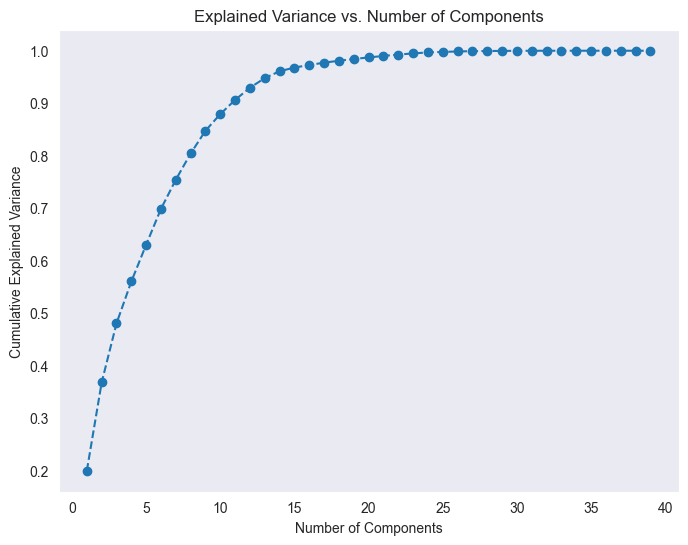

Number of components to save 90% variance: 11
Transformed dataset shape: (2704839, 18)


In [5]:
# 3.2

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Select only columns of the features (PCA works only with features)
df_scaled_features = df_scaled.drop(label_columns, axis=1)

# creating a PCA
pca = PCA()
pca.fit(df_scaled_features)

# computing cumulative explained variance 
cumul_variance =  np.cumsum(pca.explained_variance_ratio_)

# make the plot of cumulative explained variance wrt number of components
# through this graph we can see how variance is increasing while adding new components
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumul_variance) + 1), cumul_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()

# here we need to see how many components we need to save with this variance threshold 
threshold = 0.9

num_com = (cumul_variance >= threshold).argmax() + 1

print(f"Number of components to save 90% variance: {num_com}")

# so here we will create new PCA with fixed numbers of components
pca_selected = PCA(n_components=num_com)

# and transform data

pca_data = pca_selected.fit_transform(scaled_data)

# and here we will create a new dataset with different components and data
# columns is the main components

df_pca = pd.DataFrame(pca_data)


df_pca = pd.concat([df_pca, df_labels.reset_index(drop=True)], axis=1)

print("Transformed dataset shape:", df_pca.shape)


##%%
# 3.2


['Network' 'Web' 'SoftwareUpdate' 'Unspecified' 'RPC' 'System' 'Cloud'
 'Email' 'Media' 'Streaming' 'VoIP' 'Collaborative' 'Music'
 'SocialNetwork' 'Video' 'Download-FileTransfer-FileSharing' 'Chat' 'VPN'
 'RemoteAccess' 'Game' 'Database' 'Mining' 'Shopping' 'DataTransfer']


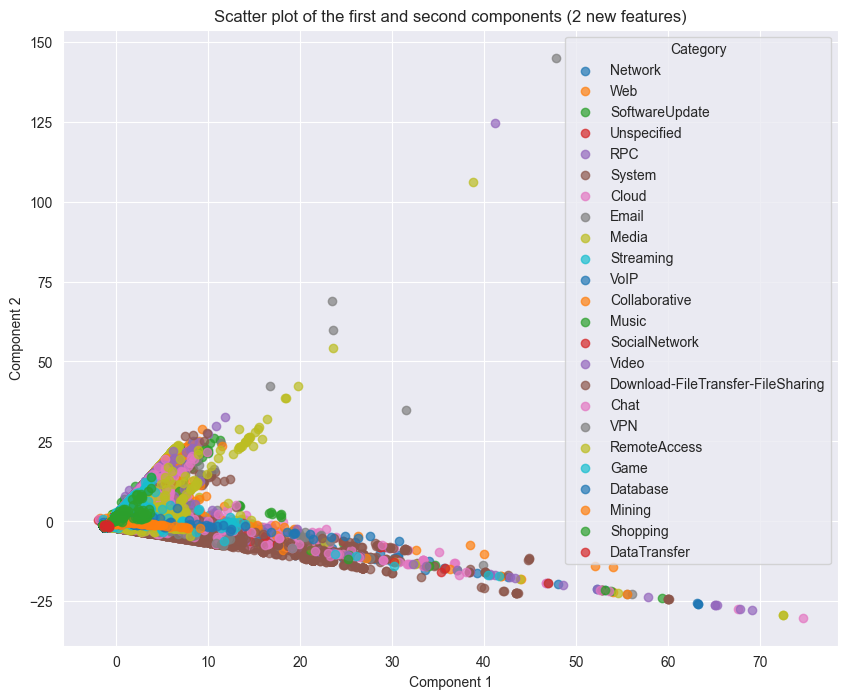

In [12]:

# 3.3
import matplotlib.pyplot as plt

# Randomly select an equal number of samples from each category

sample = 10000

sampled_data = (
    df_pca.groupby('category')
    .head(sample)
    .reset_index(drop=True)
)

pca_1 = sampled_data[0]  # first component 
pca_2 = sampled_data[1]  # second component 
categories = sampled_data['category']  # select labels

print(categories.unique())

# Create a scatter plot
plt.figure(figsize=(10, 8))

for category in categories.unique():
    category_data = sampled_data[sampled_data['category'] == category]
    plt.scatter(category_data[0], category_data[1], label=category, alpha=0.7)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Scatter plot of the first and second components (2 new features)')
plt.legend(title='Category', loc='best')

plt.show()

# Can you visually tell apart different categories? - I need to think about it

##%%


K-Means with k=2: Silhouette Score = 0.584
K-Means with k=3: Silhouette Score = 0.333
K-Means with k=4: Silhouette Score = 0.330
K-Means with k=5: Silhouette Score = 0.329
K-Means with k=6: Silhouette Score = 0.357
K-Means with k=7: Silhouette Score = 0.362
K-Means with k=8: Silhouette Score = 0.370
K-Means with k=9: Silhouette Score = 0.374
K-Means with k=10: Silhouette Score = 0.428


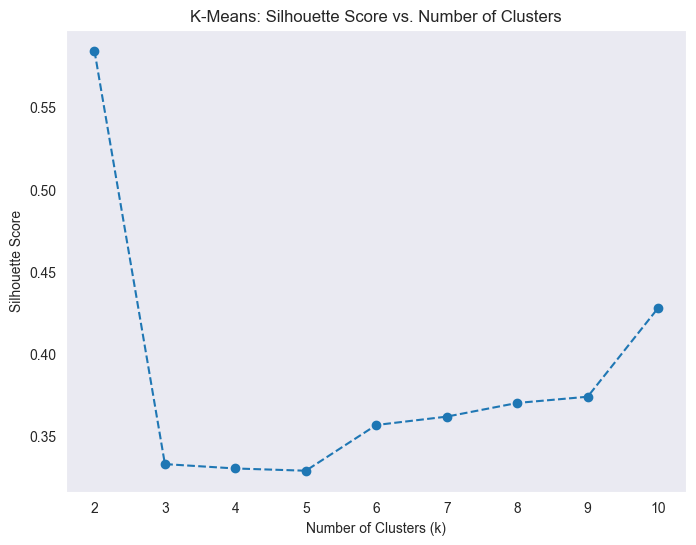

Optimal number of clusters (k): 2


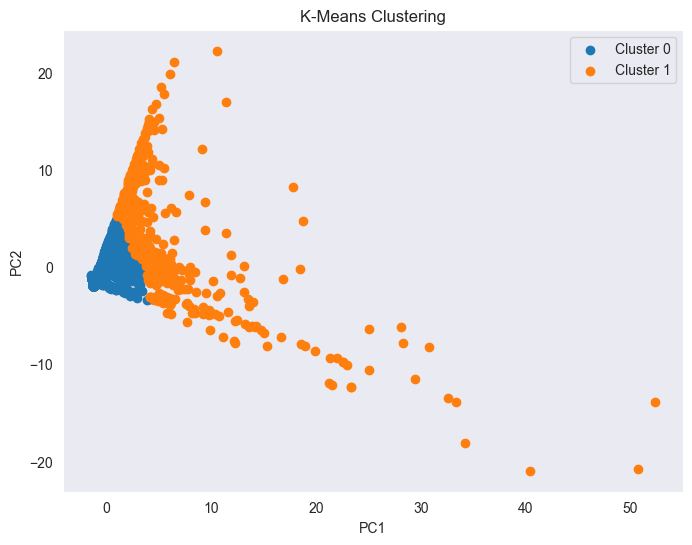

DBSCAN with eps=0.10: Silhouette Score = -0.141
DBSCAN with eps=0.20: Silhouette Score = -0.093
DBSCAN with eps=0.30: Silhouette Score = 0.006
DBSCAN with eps=0.40: Silhouette Score = 0.141
DBSCAN with eps=0.50: Silhouette Score = 0.139


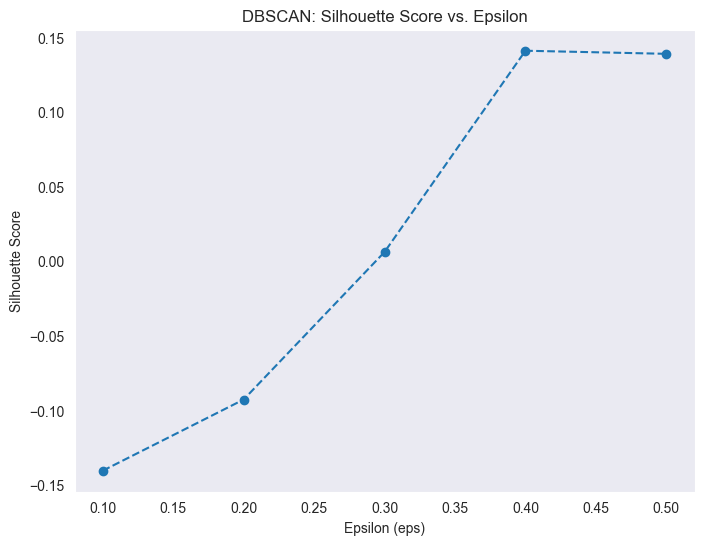

Optimal epsilon (eps): 0.4


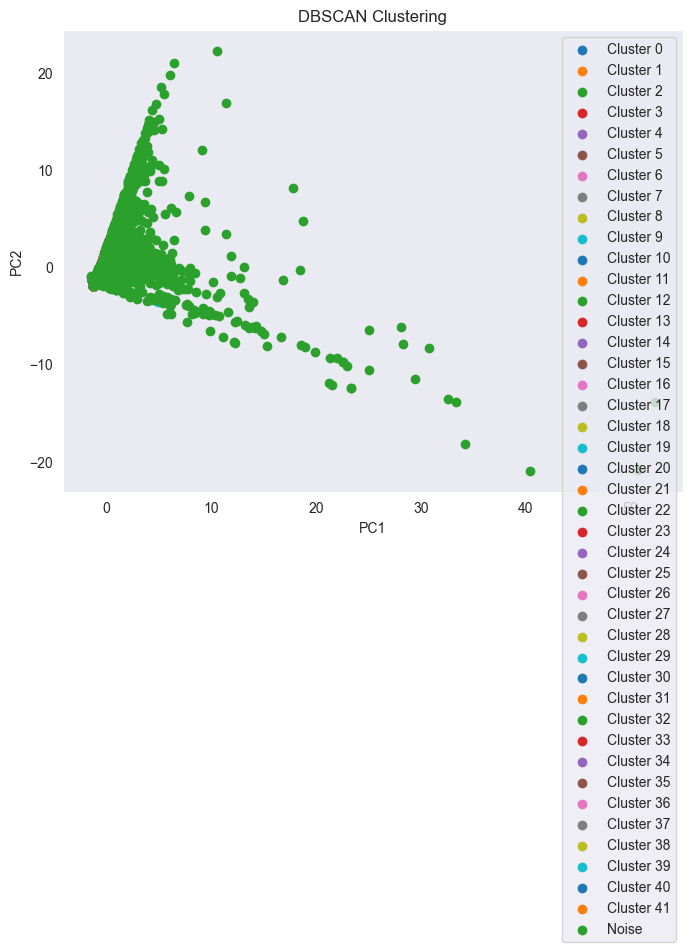

In [16]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

label_columns = ['src_ip', 'src_port', 'dst_ip', 'dst_port', 'category', 'web_service', 'proto']

# Sample data for clustering
sample_size = 5000
df_sampled = df_pca.sample(n=sample_size, random_state=42)
features = df_sampled.drop(label_columns, axis=1)
categories = df_sampled['category']

# K-Means Clustering
def kmeans_clustering(data, max_clusters=10):
    silhouette_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)
        print(f"K-Means with k={k}: Silhouette Score = {score:.3f}")
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('K-Means: Silhouette Score vs. Number of Clusters')
    plt.grid()
    plt.show()
    optimal_k = np.argmax(silhouette_scores) + 2
    print(f"Optimal number of clusters (k): {optimal_k}")
    return optimal_k

optimal_k = kmeans_clustering(features)
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans_final.fit_predict(features)
df_sampled['kmeans_cluster'] = kmeans_labels

plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = features[kmeans_labels == cluster]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering')
plt.legend()
plt.grid()
plt.show()

# DBSCAN Clustering
def dbscan_clustering(data, eps_values, min_samples=5):
    silhouette_scores = []
    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data)
        if len(set(labels)) > 1:
            score = silhouette_score(data, labels)
            silhouette_scores.append(score)
            print(f"DBSCAN with eps={eps:.2f}: Silhouette Score = {score:.3f}")
        else:
            silhouette_scores.append(-1)
    plt.figure(figsize=(8, 6))
    plt.plot(eps_values, silhouette_scores, marker='o', linestyle='--')
    plt.xlabel('Epsilon (eps)')
    plt.ylabel('Silhouette Score')
    plt.title('DBSCAN: Silhouette Score vs. Epsilon')
    plt.grid()
    plt.show()
    optimal_eps = eps_values[np.argmax(silhouette_scores)]
    print(f"Optimal epsilon (eps): {optimal_eps}")
    return optimal_eps

eps_range = np.linspace(0.1, 0.5, 5)
optimal_eps = dbscan_clustering(features, eps_range)
dbscan_final = DBSCAN(eps=optimal_eps, min_samples=5)
dbscan_labels = dbscan_final.fit_predict(features)
df_sampled['dbscan_cluster'] = dbscan_labels

plt.figure(figsize=(8, 6))
unique_labels = set(dbscan_labels)
for label in unique_labels:
    cluster_data = features[dbscan_labels == label]
    label_name = f'Cluster {label}' if label != -1 else 'Noise'
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=label_name)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Clustering')
plt.legend()
plt.grid()
plt.show()

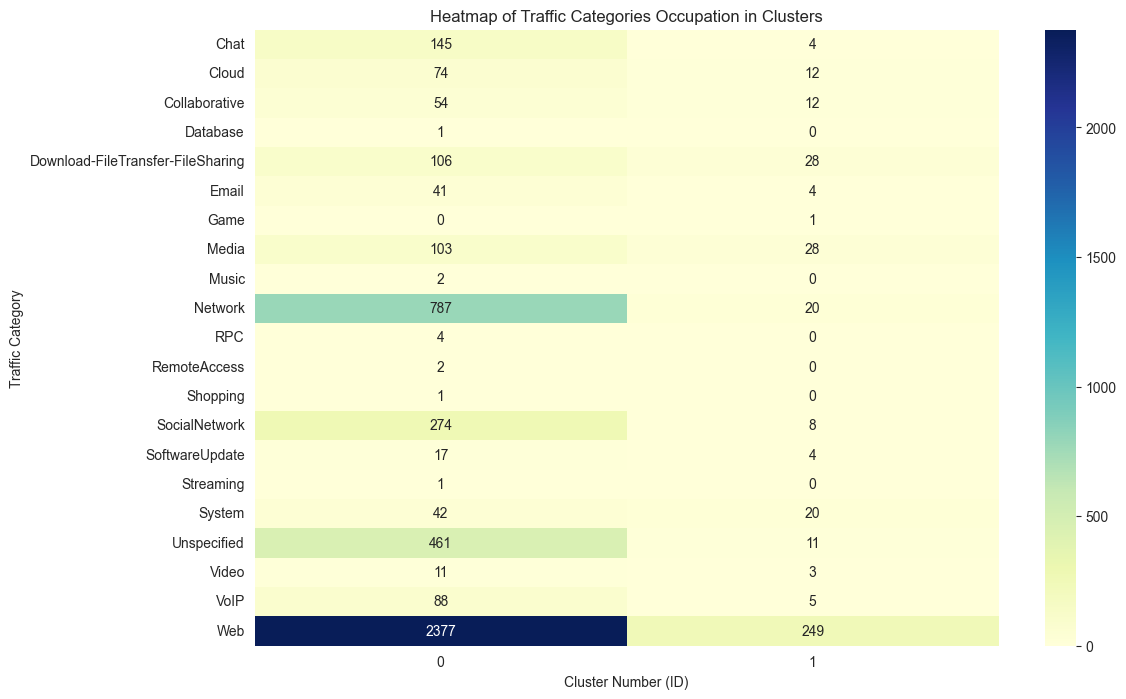

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Heatmap of K-Means Clustering
contingency_table = pd.crosstab(df_sampled['category'], df_sampled['kmeans_cluster'])
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Cluster Number (ID)')
plt.ylabel('Traffic Category')
plt.title('Heatmap of Traffic Categories Occupation in Clusters')
plt.show()